## Top down

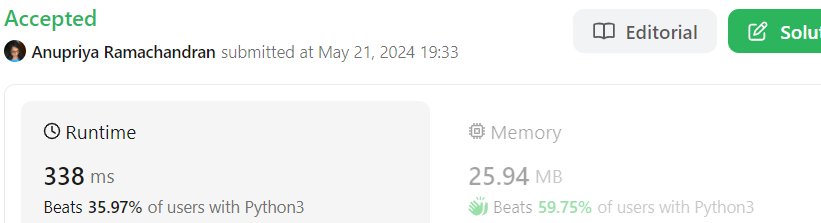

In [2]:
from typing import List

class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        dp = [[-1 for _ in range(amount + 1)] for _ in range(len(coins) + 1)]
        return self.helper( coins, amount, 0, dp)

    def helper(self, coins, amount, idx, dp):
        if idx == len(coins):
            return 0

        if amount == 0:
            return 1

        if dp[idx][amount] == -1:
            takethis = 0
            if coins[idx] <= amount:
                takethis = self.helper(coins, amount - coins[idx], idx, dp)
            nottakethis = self.helper(coins, amount, idx + 1, dp)
            dp[idx][amount] = takethis + nottakethis
        return dp[idx][amount]

# Bottom Up
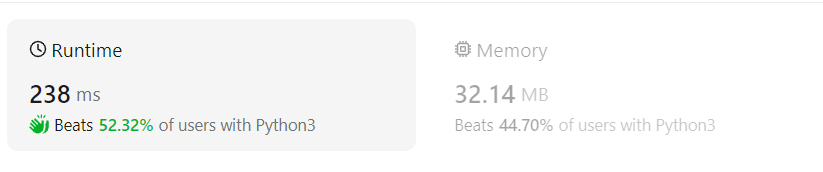

In [3]:
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        n  = len(coins)
        dp = [[0 for _ in range(amount + 1)] for _ in range(len(coins) + 1)]

        for i in range(n+1):
            dp[i][0] = 1

        for i in range(1, n+1):
            for j in range(amount + 1):
                takethis = 0
                if coins[i-1] <= j:
                    dp[i][j] = dp[i][j-coins[i-1]] + dp[i-1][j]
                else:
                    dp[i][j] = dp[i-1][j]

        return dp[n][amount]